### Dinkey Creek Projected Climate
Climate metadata
Download date
Download link
Spatial subset

Processing workflow
Rough description of each simulation (with links)

Notes about fire weather production

In [263]:
# Load required libraries and establish data directories

# ------- Notebook config
%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt

# ------- Load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import gdal, os, osr

# ------- Working directory
dataDir = 'Z:/Dan K/DinkeyCreek/Climate Projections/CMIP5_Components/'


In [268]:
# Read in historic climate
histclim = 'Z:/Dan K/DinkeyCreek/Climate Projections/DAYMET_Historic.csv'


In [265]:
# Generate some headers for our dataframe
ecoRegions = []
econame = 'ECO'
econums = np.arange(1,9,1)
econums = map(str, econums)
for eco in econums:
    ecoRegions.append(econame + eco)


In [270]:
CMIP5files = next(os.walk(dataDir))[2]
climateProj = pd.read_csv(dataDir + CMIP5files[0])
metvars = ['prcp','tmax','tmin']
metstats = ['mean','var','std']
#climateProj = pd.read_csv(histclim)

In [271]:
for filename in CMIP5files:

    modelName = filename.split('_')[0]
    forcing = filename.split('_')[1]
    print modelName, forcing

MIROC5 RCP26
MIROC5 RCP45
MIROC5 RCP85
MRI RCP26
MPI RCP45
GFDL A2
CSIRO A1B
GISSAOM A1B
DAYMET Historic.csv
MIROC5 RCP60
CCSM4 RCP85
CNRM RCP85
PCM A2
GISS RCP26
GFDL B1
FGOALS RCP85


In [318]:
def formatCDPData(dataDir, CDP_Data_File, ecoregionHeaders, metVarNames, metStatsNames):
    idx = 0
    ii = 0
    
    climateProj = pd.read_csv(dataDir + CDP_Data_File)
    modelName = CDP_Data_File.split('_')[0]
    scenario = CDP_Data_File.split('_')[1]

    for var in metVarNames:
        breakIndices = climateProj[climateProj[climateProj.columns[0]].str.\
                               contains('#') == True].index.tolist()
        if idx == 0:
            clmvar = climateProj[2:breakIndices[0]]
        elif idx == 1:
            clmvar = climateProj[breakIndices[0]+3:breakIndices[1]]
        else:
            clmvar = climateProj[breakIndices[1]+3:]

        clmvar.rename(columns={clmvar.columns[0]: 'TIMESTEP'}, inplace=True)
        i = 1
        k = 9

        for stat in metStatsNames:
            if ii == 0:
                clmLong = clmvar.loc[:,clmvar.columns[i:k]]
                clmLong.columns = ecoregionHeaders
                clmLong['STAT'] = stat
                clmLong['VAR'] = var
                clmLong['TIME'] = clmvar['TIMESTEP']
                
                
                ii += 1

            else:
                clmsub = clmvar.loc[:,clmvar.columns[i:k]]
                clmsub.columns = ecoRegions
                clmsub['STAT'] = stat
                clmsub['VAR'] = var
                clmsub['TIME'] = clmvar['TIMESTEP']

                clmLong = pd.concat([clmLong, clmsub])

            i += numRegions
            k += numRegions
        idx += 1

    clmLong[ecoRegions] = clmLong[ecoRegions].apply(pd.to_numeric)
    clmdf = pd.melt(clmLong, id_vars=['STAT','VAR','TIME'], 
            value_vars=ecoRegions, 
            var_name = 'ECOREGION', 
            value_name='VALUE')

    clmdf['Time_DTO'] = pd.to_datetime(clmdf.TIME)
    clmdf['MODEL'] = modelName
    clmdf['SCENARIO'] = scenario
    return clmdf

In [316]:
CMIP5files

['MIROC5_RCP26_Monthly.csv',
 'MIROC5_RCP45_Monthly.csv',
 'MIROC5_RCP85_Monthly.csv',
 'MRI_RCP26_Monthly.csv',
 'MPI_RCP45_Monthly.csv',
 'GFDL_A2_Monthly.csv',
 'CSIRO_A1B_Monthly.csv',
 'GISSAOM_A1B_Monthly.csv',
 'DAYMET_Historic.csv',
 'MIROC5_RCP60_Monthly.csv',
 'CCSM4_RCP85_Monthly.csv',
 'CNRM_RCP85_Monthly.csv',
 'PCM_A2_Monthly.csv',
 'GISS_RCP26_Monthly.csv',
 'GFDL_B1_Monthly.csv',
 'FGOALS_RCP85_Monthly.csv']

In [422]:
idx = 0
for filename in CMIP5files:
    if idx == 0:
        climateData = formatCDPData(dataDir, filename, ecoRegions, metvars, metstats)
    else:
        cmipInput = formatCDPData(dataDir, filename, ecoRegions, metvars, metstats)
        climateData = pd.concat([climateData, cmipInput])
    idx = idx + 1

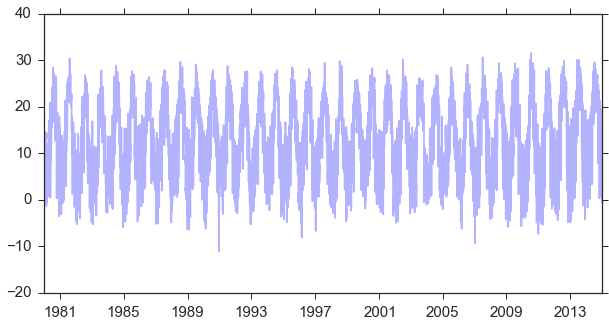

In [423]:
test = climateData[(climateData.STAT == 'mean') & (climateData.VAR == 'tmax') & (climateData.ECOREGION == 'ECO1')]
test.index = test.Time_DTO
check = test[test.MODEL == 'DAYMET']
f, (ax1) = plt.subplots(1,1, figsize = (10,5))
IDX = 0
colors = ['blue','green','orange','red']
for scenario in np.unique(check.SCENARIO):
    checkForcing = check[check.SCENARIO == scenario]
    ax1.plot(checkForcing.index, checkForcing.VALUE, color = colors[IDX], alpha = 0.3)
    IDX += 1

In [425]:
clmdfsub = DFsub[DFsub.MODEL == model]
clmdfsubVAR = clmdfsub[clmdfsub.STAT == 'std']
np.unique(DFsub.STAT)

array(['mean'], dtype=object)

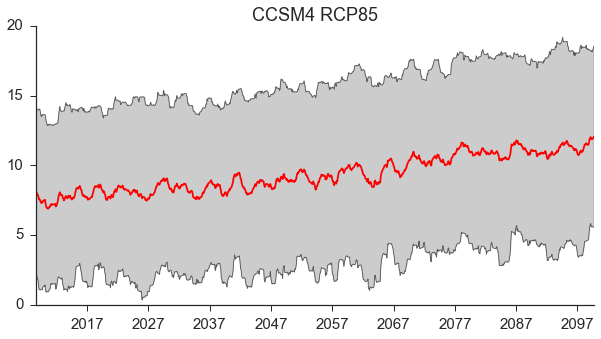

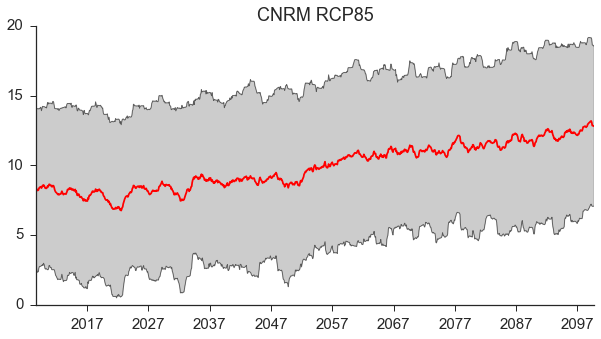

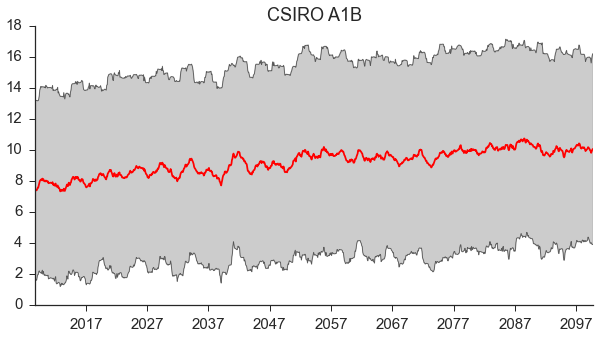

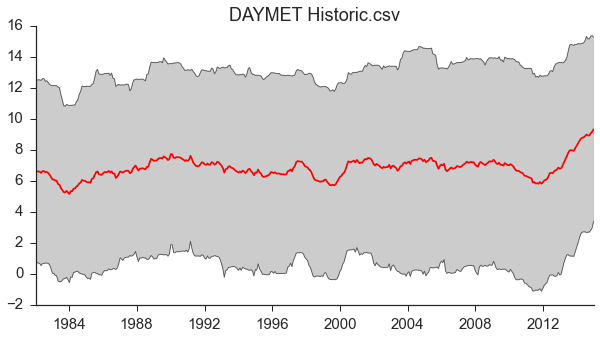

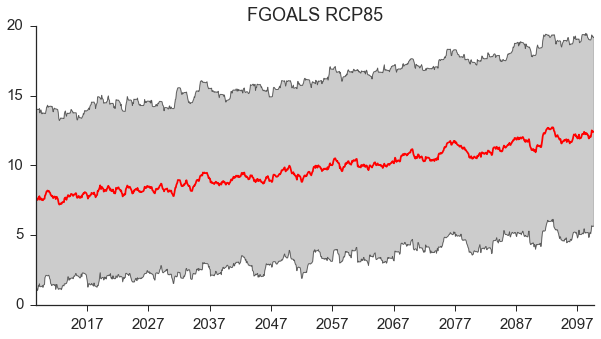

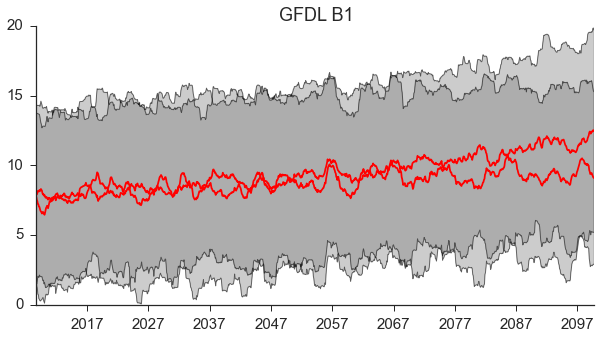

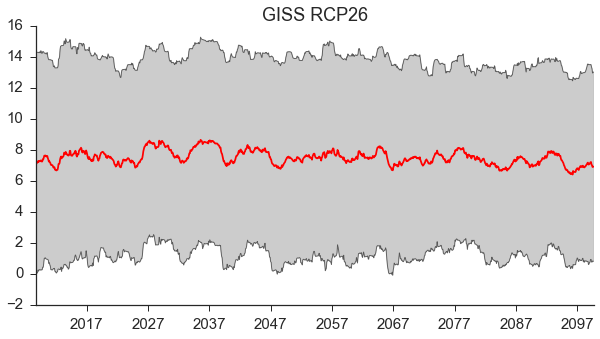

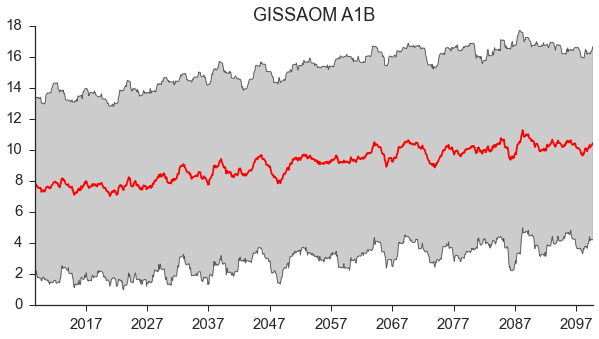

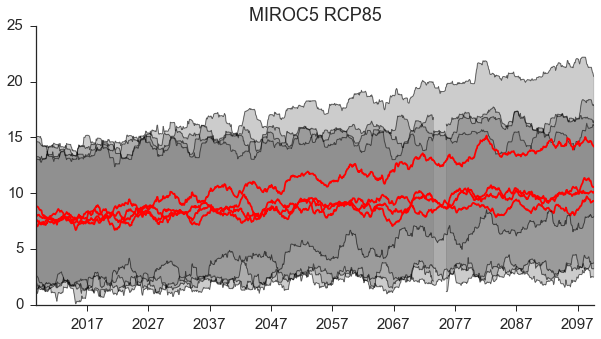

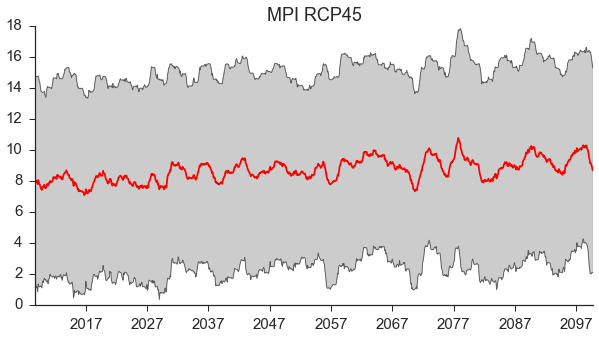

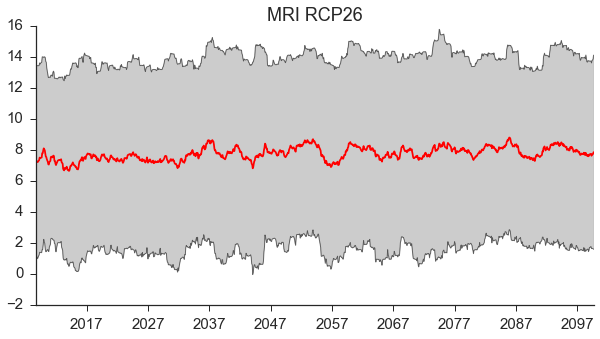

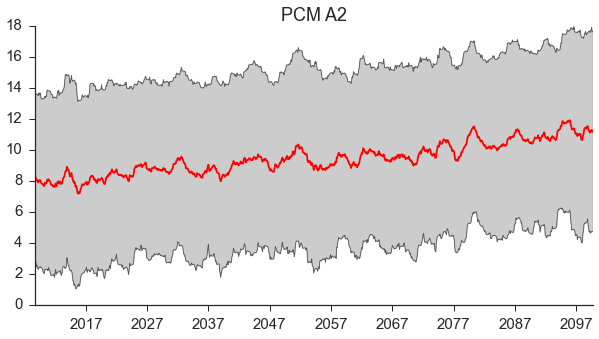

In [426]:
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.5)

DFsub = climateData[climateData.ECOREGION == 'ECO1']

for model in np.unique(DFsub.MODEL):
    clmdfsub = DFsub[DFsub.MODEL == model]
    f, (ax1) = plt.subplots(1,1, figsize = (10,5))

    for scenario in np.unique(clmdfsub.SCENARIO):
        clmdfsubVAR = clmdfsub[clmdfsub.STAT == 'std']
        clmdfsub = clmdfsub[clmdfsub.STAT == 'mean']
        
        clmdfsub.index = clmdfsub.Time_DTO
        clmdfsubVAR.index = clmdfsubVAR.Time_DTO

        if model == 'DAYMET':
            tsStart = clmdfsub.index.min()
            tsStop = clmdfsub.index.max()
            clmdfsub = clmdfsub.groupby(['MODEL','SCENARIO','VAR','STAT', 
                                         clmdfsub.index.year, clmdfsub.index.month]).mean().reset_index()
            clmdfsubVAR = clmdfsubVAR.groupby(['MODEL','SCENARIO','VAR', 'STAT', 
                                         clmdfsubVAR.index.year, clmdfsubVAR.index.month]).mean().reset_index()
            daymetIndex = pd.date_range(tsStart,tsStop,freq = 'M')

            clmdfsubM = clmdfsub[clmdfsub.SCENARIO == scenario]
            tmin = clmdfsubM[clmdfsubM.VAR == 'tmin']
            tmax = clmdfsubM[clmdfsubM.VAR == 'tmax']
            
            tminVar = clmdfsubVAR[clmdfsubVAR.VAR == 'tmin']
            tmaxVar = clmdfsubVAR[clmdfsubVAR.VAR == 'tmax']
           
            tmin.index = daymetIndex
            tmax.index = daymetIndex
            tminVar.index = daymetIndex
            tmaxVar.index = daymetIndex

        else:    
            clmdfsubM = clmdfsub[clmdfsub.SCENARIO == scenario]
            tmin = clmdfsubM[clmdfsubM.VAR == 'tmin']
            tmax = clmdfsubM[clmdfsubM.VAR == 'tmax']
            tminVar = clmdfsubVAR[clmdfsubVAR.VAR == 'tmin']
            tmaxVar = clmdfsubVAR[clmdfsubVAR.VAR == 'tmax']


        meanTemp = (tmin.VALUE + tmax.VALUE) / 2
        meantempSmooth = meanTemp.rolling(window = 24, center=False).mean()
        meantempSTD = meanTemp.rolling(window = 24, center=False).std()

        y1 = meantempSmooth + meantempSTD
        y2 = meantempSmooth - meantempSTD

        ax1.plot(meanTemp.index, meantempSmooth, 
                 color = 'red')
        ax1.set_title(model + ' ' + scenario)
        ax1.plot(tmax.index, y1,lw = 1, alpha = 0.5,
                 color = 'k')
        ax1.plot(tmin.index, y2,lw = 1, alpha = 0.5,
                 color = 'k')

        ax1.fill_between(tmax.index, y1, y2, 
                         where=y2 <= y1, facecolor='gray', 
                         alpha = 0.4, interpolate=True)


        sns.despine()

In [416]:
clmdfsub

,MODEL,SCENARIO,VAR,level_3,level_4,VALUE
0,DAYMET,Historic.csv,prcp,1980,1,14.985642
1,DAYMET,Historic.csv,prcp,1980,2,12.224085
2,DAYMET,Historic.csv,prcp,1980,3,4.733604
3,DAYMET,Historic.csv,prcp,1980,4,2.133954
4,DAYMET,Historic.csv,prcp,1980,5,1.719423
5,DAYMET,Historic.csv,prcp,1980,6,0.008340
6,DAYMET,Historic.csv,prcp,1980,7,0.000000
7,DAYMET,Historic.csv,prcp,1980,8,0.000000
8,DAYMET,Historic.csv,prcp,1980,9,0.000793
9,DAYMET,Historic.csv,prcp,1980,10,0.537834


AttributeError: 'DataFrame' object has no attribute 'Time'

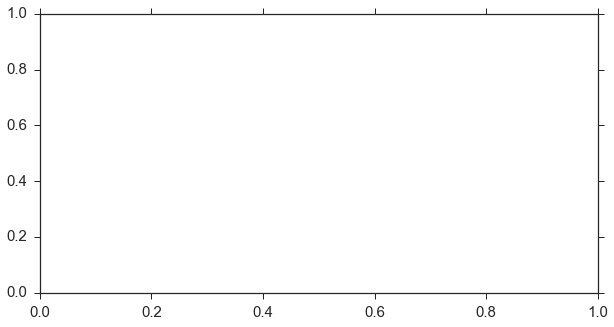

In [276]:
clmdfsub = clmdfsub[clmdfsub.ECOREGION == 'ECO1']

sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.5)
f, (ax1) = plt.subplots(1,1, figsize = (10,5))
clmdfsub.index = clmdfsub.Time
tmin = clmdfsub[clmdfsub.VAR == 'tmin']
tmax = clmdfsub[clmdfsub.VAR == 'tmax']

ax1.plot(tmin.Time, tmin.VALUE, 
         ls = '', marker = '.', 
         ms = 15, alpha = 0.05, 
         color = 'gray')
ax1.plot(tmin.index, tmin.VALUE.rolling(window = 12, center=False).mean())

ax1.plot(tmax.Time, tmax.VALUE, 
         ls = '', marker = '.', 
         ms = 15, alpha = 0.05, 
         color = 'gray')
ax1.plot(tmax.index, tmax.VALUE.rolling(window = 12, center=False).mean())

sns.despine()